# Python "científico": biblioteca _pandas_

![](images/sci_python_pandas.png)

_web site_: (`pandas.pydata.org`)

![](images/pandas_web.png)

## `Series`

> `Series` is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. 

In [1]:
import pandas as pd

Uma Série (_Series_) é um conjunto (ordenado) de valores, mas cada valor é associado a uma "etiqueta" (_label_).

Ao conjunto das etiquetas dá-se o nome de "**índice**".

Quando construímos uma Série, usando a função `Series()`, podemos indicar o índice.

In [2]:
s = pd.Series([1.4,2.2,3.2,6.5,12], index=['a', 'b', 'c', 'd', 'e'])
print s

a     1.4
b     2.2
c     3.2
d     6.5
e    12.0
dtype: float64


Se não indicarmos um índice, o conjunto dos inteiros sucessivos será o índice.

In [3]:
s = pd.Series([1.4,2.2,3.2,6.5,12])
print s

0     1.4
1     2.2
2     3.2
3     6.5
4    12.0
dtype: float64


As Séries podem ser construídas a partir de um dicionário, em que as chaves são o índice.

In [4]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d)
print s

a    0.0
b    1.0
c    2.0
dtype: float64


Podemos, mesmo neste caso, indicar um índice. Caso o índice tenha elementos para além das chaves do dicionário, haverá **valores em falta**.

In [5]:
s = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.}, index=['b', 'c', 'd', 'a'])
print s

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


O uso do marcador `NaN` para indicar **valores em falta** e a existência de muitas funções de análise que levam em conta valores em falta são uma característica muito poderosa do módulo `pandas`.

### Indexação e operações vetoriais

As Séries podem ser usadas **como dicionários: as etiquetas comportam-se como chaves** e são usadas para indexar uma Série. para obter um valor (e também para modificar um valor).

Tal como nos dicionários, o operador `in` **testa a existência de uma etiqueta**.

In [6]:
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print s

print '-----------'
print s['b']
print s.c # notação abreviada

s['b'] = 0.5

print

print 'z' in s # teste de existência de um label
print 'd' in s

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
-----------
1.0
2.0

False
True


Mas as Séries são muito mais poderosas: elas comportam-se como _arrays_ do módulo `numpy`. Podemos usar:

- indexação com inteiros
- _slices_
- **operações vetoriais**.

In [7]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}, 
              index=['b', 'c', 'd', 'e', 'a'])
print s
print '-----------\n{}'.format(s[0])
print '-----------\n{}'.format(s[:3])
print '-----------\n{}'.format(s**2)
print '-----------\n{}'.format(s[s > 0.75])

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
dtype: float64
-----------
1.0
-----------
b    1.0
c    3.0
d    NaN
dtype: float64
-----------
b    1.00
c    9.00
d     NaN
e    3.24
a    0.25
dtype: float64
-----------
b    1.0
c    3.0
e    1.8
dtype: float64


Também muito poderoso é o facto de que, quando aplicamos operações vetoriais sobre Séries (por exemplo, na soma de duas séries), **os valores são "alinhados" pelos respetivos _labels_** antes da operação. Vejamos estas duas séries:

In [8]:
s1 = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8})
s2 = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'f': 1.8})

print s1
print '-----------'
print s2
print '--Soma-----'
print s1 + s2

a    0.5
b    1.0
c    3.0
e    1.8
dtype: float64
-----------
a    0.5
b    1.0
c    3.0
f    1.8
dtype: float64
--Soma-----
a    1.0
b    2.0
c    6.0
e    NaN
f    NaN
dtype: float64


A soma das duas Séries resulta numa Série em que todas as etiquetas estão presentes (**união de conjuntos**).

As que só existirem numa das Séries ou as que, numa das Séries, têm o valor `NaN`, terão o valor `NaN` no resultado final.

A função `.dropna()` permite eliminar os _valores em falta_.

In [9]:
s1 = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8})
s2 = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'f': 1.8})
s3 = s1 + s2
print s3
print '-----------'
print s3.dropna()

a    1.0
b    2.0
c    6.0
e    NaN
f    NaN
dtype: float64
-----------
a    1.0
b    2.0
c    6.0
dtype: float64


### Funções descritivas dos valores

As Séries têm algumas funções de estatística descritiva de grande utilidade.

Note-se que, em geral, **os valores em falta são ignorados nos cálculos**.

In [10]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8})
print s
print '-----------------'
print 'Média:         {}'.format(s.mean())
print 'Desvio padrão: {:5.3f}'.format(s.std())

a    0.5
b    1.0
c    3.0
e    1.8
dtype: float64
-----------------
Média:         1.575
Desvio padrão: 1.090


In [11]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8})
print s.describe()

count    4.000000
mean     1.575000
std      1.090489
min      0.500000
25%      0.875000
50%      1.400000
75%      2.100000
max      3.000000
dtype: float64


In [12]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8})
print s.cumsum()

a    0.5
b    1.5
c    4.5
e    6.3
dtype: float64


## `DataFrame`

> `DataFrame` is a **2-dimensional labeled data structure** with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a **dict of Series objects**. It is generally the most commonly used pandas object.

Uma _DataFrame_ é um quadro bidimensional, em que cada coluna se comporta como uma Série, mas em que existe um índice comum a todas as colunas.

Para ilustar o uso de uma `DataFrame`, vamos ler e processar a informação da UniProt sobre a levedura _S. cerevisiae_.

A `DataFrame` terá as colunas "**ac**", "**rev**", "**n**" e "**sequence**"

In [13]:
nome_ficheiro = 'uniprot_proteome_S_cerevisiae.txt'

def get_prots(filename):
    with open(filename) as big:
        tudo = big.read()
    todas = [p for p in tudo.split('//\n') if len(p) != 0]
    return todas

prots = get_prots('uniprot_proteome_S_cerevisiae.txt')

def process_prot(p):
    linhas = p.split('\n')
    linhasid = linhas[0]
    linhaac = linhas[1]
    partes = linhasid.split()
    reviewed = partes[2][0:-1]
    naa = int(partes[3])
    partes = linhaac.split()
    ac = partes[1][0:-1]
    
    for i in range(len(linhas)-1, 0, -1):
        if linhas[i].startswith('SQ'):
            break
    s = ''.join(linhas[i+1:])
    seq = ''.join(s.split())
    return {'ac':ac, 'rev':reviewed, 'n':naa, 'seq':seq}

pinfo = [process_prot(p) for p in prots]
print 'Numero total de proteínas: {}'.format(len(pinfo))
print pinfo[0]

Numero total de proteínas: 241
{'ac': 'P38903', 'rev': 'Reviewed', 'seq': 'MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPASASSSSHGTTHSSASSTGSKSTTEKGKQSGSVPSQGKHHSSSTSKTKTATTPSSSSSSSRSSSVSRSGSSSTKKTSSRKGQEQSKQSQQPSQSQKQGSSSSSAAIMNPTPVLTVTKDDKSTSGEDHAHPTLLGAVSAVPSSPISNASGTAVSSDVENGNSNNNNMNINTSNTQDANHASSQSIDIPRSSHSFERLPTPTKLNPDTDLELIKTPQRHSSSRFEPSRYTPLTKLPNFNEVSPEERIPLFIAKVDQCNTMFDFNDPSFDIQGKEIKRSTLDELIEFLVTNRFTYTNEMYAHVVNMFKINLFRPIPPPVNPVGDIYDPDEDEPVNELAWPHMQAVYEFFLRFVESPDFNHQIAKQYIDQDFILKLLELFDSEDIRERDCLKTTLHRIYGKFLSLRSFIRRSMNNIFLQFIYETEKFNGVAELLEILGSIINGFALPLKEEHKVFLVRILIPLHKVRCLSLYHPQLAYCIVQFLEKDPLLTEEVVMGLLRYWPKINSTKEIMFLNEIEDIFEVIEPLEFIKVEVPLFVQLAKCISSPHFQVAEKVLSYWNNEYFLNLCIENAEVILPIIFPALYELTSQLELDTANGEDSISDPYMLVEQAINSGSWNRAIHAMAFKALKIFLETNPVLYENCNALYLSSVKETQQRKVQREENWSKLEEYVKNLRINNDKDQYTIKNPELRNSFNTASENNTLNEENENDCDSEIQ', 'n': 757}


Podemos construir uma `DataFrame` a partir de uma lista de dicionários. As **chaves dos dicionários serão as colunas**.

In [14]:
prots = pd.DataFrame(pinfo)
prots

,ac,n,rev,seq
0,P38903,757,Reviewed,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
1,P31383,635,Reviewed,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
2,Q00362,526,Reviewed,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...
3,P47177,404,Reviewed,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...
4,P47096,177,Reviewed,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...
5,P40433,827,Reviewed,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...
6,Q12471,397,Reviewed,MGGSSDSDSHDGYLTSEYNSSNSLFSLNTGNSYSSASLDRATLDCQ...
7,P38720,489,Reviewed,MSADFGLIGLAVMGQNLILNAADHGFTVCAYNRTQSKVDHFLANEA...
8,P53319,492,Reviewed,MSKAVGDLGLVGLAVMGQNLILNAADHGFTVVAYNRTQSKVDRFLA...
9,P47182,288,Reviewed,MASRKLRDQIVIATKFTTDYKGYDVGKGKSANFCGNHKRSLHVSVR...


Podemos mudar o índice para uma das colunas.

In [15]:
prots = prots.set_index('ac')
prots

,n,rev,seq
ac,,,
P38903,757,Reviewed,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
P31383,635,Reviewed,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
Q00362,526,Reviewed,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...
P47177,404,Reviewed,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...
P47096,177,Reviewed,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...
P40433,827,Reviewed,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...
Q12471,397,Reviewed,MGGSSDSDSHDGYLTSEYNSSNSLFSLNTGNSYSSASLDRATLDCQ...
P38720,489,Reviewed,MSADFGLIGLAVMGQNLILNAADHGFTVCAYNRTQSKVDHFLANEA...
P53319,492,Reviewed,MSKAVGDLGLVGLAVMGQNLILNAADHGFTVVAYNRTQSKVDRFLA...


Para inspeção rápida, as funções `.head()` e `.tail()` apresentam o início e o fim da `DataFrame`

In [16]:
prots.head()

,n,rev,seq
ac,,,
P38903,757,Reviewed,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
P31383,635,Reviewed,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
Q00362,526,Reviewed,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...
P47177,404,Reviewed,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...
P47096,177,Reviewed,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...


In [17]:
prots.tail()

,n,rev,seq
ac,,,
P32448,525,Reviewed,MPKNRGVLDAITRSVIDGSDQESSSSFNSDKEYAAVTKGLSSSRVQ...
P34233,588,Reviewed,MSSLYIKTPLHALSAGPDSHANSSYYDNLLLPSFSNLSSNISRNNI...
P53895,289,Reviewed,MARPQNHRRSNWTERDDNDDYLFQRFLEESETRHSREPSPVTEQSQ...
A0A0B7P221,28,Unreviewed,MIRQKIFVFIVKSRRNSICPAIRRKEDY
A0A0B7P1T6,108,Unreviewed,MKEVTKMLYCALLVTKVIYQMKGKSQPKRERKKQNYWVLKSLWKRP...


A indexação com o nome de uma coluna devolve essa coluna (mas associada ao índice).

Cada coluna comporta-se como uma Série.

In [18]:
print prots['n']

ac
P38903         757
P31383         635
Q00362         526
P47177         404
P47096         177
P40433         827
Q12471         397
P38720         489
P53319         492
P47182         288
Q08361         143
P42884         376
P43546         152
P25612         363
Q07747         329
P43547         212
P12904         322
P37898         856
P08521          25
P32357         355
P23542         418
Q01802         451
Q08641         628
Q02486         183
P14164         731
P47146         123
P15891         592
P39970         489
P40535         587
Q00955        2233
              ... 
P47117         449
P80428         489
Q12509         438
P53946         755
Q12406         477
Q12386         881
Q05123         467
P38328         384
P53731         342
Q05933         178
P33204         171
P40518         154
Q06597         130
Q06598         404
P18634         518
Q8TGM7          61
Q8TGM5          67
P53244         586
Q06541         321
Q03862         593
Q06822         443
P50275   

In [19]:
print prots['n']['P31383']
print
print prots['n'].max()
print prots['n'].min()
print prots['n'].mean()

635

2233
25
457.095435685


In [20]:
print prots['n'].describe()

count     241.000000
mean      457.095436
std       285.785065
min        25.000000
25%       250.000000
50%       394.000000
75%       605.000000
max      2233.000000
Name: n, dtype: float64


Para obter uma linha usamos `.loc` e indexação por um _label_.

In [21]:
print prots.loc['P31383']

n                                                    635
rev                                             Reviewed
seq    MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
Name: P31383, dtype: object


In [22]:
print prots.loc['P31383']['seq'].count('W')

7


A indexação com condições sobre as colunas é muito poderosa:

In [23]:
bigs = prots[prots['n'] > 800]
print len(bigs)
bigs

24


,n,rev,seq
ac,,,
P40433,827,Reviewed,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...
P37898,856,Reviewed,MSREVLPNNVTPLHYDITLEPNFRAFTFEGSLKIDLQINDHSINSV...
Q00955,2233,Reviewed,MSEESLFESSPQKMEYEITNYSERHTELPGHFIGLNTVDKLEESPL...
P25371,1049,Reviewed,MGSHRRYLYYSILSFLLLSCSVVLAKQDKTPFFEGTSSKNSRLTAQ...
P07248,1323,Reviewed,MANVEKPNDCSGFPVVDLNSCFSNGFNNEKQEIEMETDDSPILLMS...
Q99222,893,Reviewed,MLRRELNNSISNRSIENESFPFERPNVSYIISAEFDNKLGPILKHQ...
Q12482,902,Reviewed,MEQINSNSRKKKQQLEVFKYFASVLTKEDKPISISNGMLDMPTVNS...
P03875,834,Reviewed,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...
P03876,854,Reviewed,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...


In [24]:
bigs = prots[prots['n'] > 800]
bigs['n']

ac
P40433     827
P37898     856
Q00955    2233
P25371    1049
P07248    1323
Q99222     893
Q12482     902
P03875     834
P03876     854
P38266     947
Q12028     832
P38065    1025
P46682     809
Q08951     932
P53886    1748
Q12440     853
P32454     952
Q01217     863
P05085     880
P08566    1588
Q04052     950
Q12386     881
P50275     885
P40467     964
Name: n, dtype: int64

In [25]:
prots[prots['n'] > 800]['n'].mean()

1036.6666666666667

In [26]:
prots['n'].idxmax()

'Q00955'

In [27]:
print prots.loc[prots['n'].idxmax()]

n                                                   2233
rev                                             Reviewed
seq    MSEESLFESSPQKMEYEITNYSERHTELPGHFIGLNTVDKLEESPL...
Name: Q00955, dtype: object


In [28]:
prots[prots['n']==prots['n'].max()]

,n,rev,seq
ac,,,
Q00955,2233,Reviewed,MSEESLFESSPQKMEYEITNYSERHTELPGHFIGLNTVDKLEESPL...


In [29]:
prots[prots['n']==prots['n'].min()]

,n,rev,seq
ac,,,
P08521,25,Reviewed,MFSLSNSQYTCQDYISDHIWKTSSH


Para aplicar funções de _strings_ a toda uma coluna de uma só vez, usamos o atributo `.str.` sobre essa coluna (o resultado é uma Série):

In [30]:
numW = prots['seq'].str.count('W')
numW

ac
P38903         5
P31383         7
Q00362         6
P47177         1
P47096         3
P40433         6
Q12471         0
P38720         8
P53319         8
P47182         6
Q08361         1
P42884         9
P43546         1
P25612         8
Q07747         8
P43547         7
P12904         1
P37898        21
P08521         1
P32357         4
P23542         6
Q01802         9
Q08641         8
Q02486         2
P14164         2
P47146         6
P15891         8
P39970         2
P40535         1
Q00955        24
              ..
P47117         5
P80428         9
Q12509         7
P53946         8
Q12406         7
Q12386         8
Q05123         6
P38328        10
P53731         1
Q05933         1
P33204         0
P40518         2
Q06597         2
Q06598         9
P18634         4
Q8TGM7         0
Q8TGM5         0
P53244         3
Q06541         9
Q03862         6
Q06822         6
P50275         4
P32447         2
P46993         7
P40467         3
P32448         0
P34233         5
P53895     

Com uma indexação por nome, podemos inserir uma coluna nova na `DataFrame` (no fim).

In [31]:
prots['W'] = numW
prots

,n,rev,seq,W
ac,,,,
P38903,757,Reviewed,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...,5
P31383,635,Reviewed,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...,7
Q00362,526,Reviewed,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...,6
P47177,404,Reviewed,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...,1
P47096,177,Reviewed,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...,3
P40433,827,Reviewed,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...,6
Q12471,397,Reviewed,MGGSSDSDSHDGYLTSEYNSSNSLFSLNTGNSYSSASLDRATLDCQ...,0
P38720,489,Reviewed,MSADFGLIGLAVMGQNLILNAADHGFTVCAYNRTQSKVDHFLANEA...,8
P53319,492,Reviewed,MSKAVGDLGLVGLAVMGQNLILNAADHGFTVVAYNRTQSKVDRFLA...,8


As `DataFrame`s também têm funções descritivas, mas o facto de cada coluna ser uma Série podemos realizar muitas análises de uma forma simples.

In [32]:
print prots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, P38903 to A0A0B7P1T6
Data columns (total 4 columns):
n      241 non-null int64
rev    241 non-null object
seq    241 non-null object
W      241 non-null int64
dtypes: int64(2), object(2)
memory usage: 9.4+ KB
None


In [33]:
print prots['W'].describe()

count    241.000000
mean       4.954357
std        4.304309
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       24.000000
Name: W, dtype: float64


In [34]:
print prots['rev'].value_counts()

Reviewed      239
Unreviewed      2
Name: rev, dtype: int64


In [35]:
# só no IPython/Jupyter notebook
%matplotlib inline

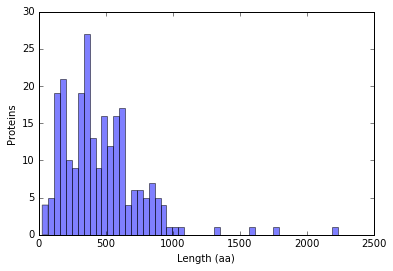

In [36]:
import matplotlib.pyplot as pl
p = prots['n'].plot(kind='hist', alpha=0.5, bins=50)
p.set_ylabel('Proteins')
x = p.set_xlabel('Length (aa)')